In [26]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [37]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [29]:
from nltk.tokenize import word_tokenize

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
cd /gdrive/MyDrive/Stemaway/

/gdrive/MyDrive/Stemaway


In [3]:
ls

 BeautifulSoup.ipynb                        df_TuD.csv
'Copy of Copy of official_notebook.ipynb'   module2_tutorial/
'Copy of official_notebook.ipynb'           official_notebook.ipynb
 df_main.csv                                practiceBeautifulSoup.ipynb
 df_Social_club.csv                         TuD12_forums.pkl
 df_TuD12.csv                               Untitled0.ipynb
 df_TuD1.csv                                website.gdoc


In [3]:
import pandas as pd

In [4]:
df_forums=pd.read_csv('df_forums.csv')


In [5]:
df_forums


,forums
0,We really care about making this new website a...
1,I have been looking around for maybe an hour. ...
2,"If you click HOME, you’ll see it at the bottom..."
3,"I have a 3 second lag in chat, and there are o..."
4,FYI - a lot of people (including me) have been...
...,...
239,"@momof2T1s2, we would have a hard time doing i..."
240,Few things offer the versatility of a good old...
241,"I do input all,y data into my dexcom so when I..."
242,Decision Moves Continuous Glucose Monitors One...


In [6]:
df_forums['word_count'] = df_forums['forums'].apply(lambda x: len(str(x).split(" ")))
df_forums['char_count'] = df_forums['forums'].str.len() ## this also includes spaces


In [7]:
df_forums

,forums,word_count,char_count
0,We really care about making this new website a...,101,537.0
1,I have been looking around for maybe an hour. ...,14,69.0
2,"If you click HOME, you’ll see it at the bottom...",16,78.0
3,"I have a 3 second lag in chat, and there are o...",16,64.0
4,FYI - a lot of people (including me) have been...,131,716.0
...,...,...,...
239,"@momof2T1s2, we would have a hard time doing i...",62,350.0
240,Few things offer the versatility of a good old...,134,746.0
241,"I do input all,y data into my dexcom so when I...",155,763.0
242,Decision Moves Continuous Glucose Monitors One...,700,4721.0


In [8]:
import re
import string
# Creating a 'clean_text' function
def clean_text(text):
    #Make text lowercase, remove punctuation and remove words containing numbers.
    text=re.sub("[\(\[].*?[\)\]]", "", text)
    text = re.sub('<.*?>','', text)
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#remove punctuation
    text = re.sub('\w*\d\w*', '', text)
   # Get rid of some additional punctuation.
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(' — ', '', text)
    return text


#Remove punctuation, words containing numbers, and genereate lowercase

In [21]:
df_forums['clean_forums'] = df_forums['forums'].apply(lambda x: clean_text(str(x)))
df_forums.head()

,forums,word_count,char_count,clean_forums
0,We really care about making this new website a...,101,537.0,we really care about making this new website a...
1,I have been looking around for maybe an hour. ...,14,69.0,i have been looking around for maybe an hour w...
2,"If you click HOME, you’ll see it at the bottom...",16,78.0,if you click home youll see it at the bottom i...
3,"I have a 3 second lag in chat, and there are o...",16,64.0,i have a second lag in chat and there are onl...
4,FYI - a lot of people (including me) have been...,131,716.0,fyi a lot of people have been having trouble...


# Remove stopwords

In [28]:
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df_forums['clean_forums'] = df_forums['clean_forums'].apply(lambda x: remove_stopwords(str(x)))
df_forums.head()

,forums,word_count,char_count,clean_forums
0,We really care about making this new website a...,101,537.0,really care making new website perfect possibl...
1,I have been looking around for maybe an hour. ...,14,69.0,looking around maybe hour heck chat
2,"If you click HOME, you’ll see it at the bottom...",16,78.0,click home youll see bottom forum section
3,"I have a 3 second lag in chat, and there are o...",16,64.0,second lag chat us
4,FYI - a lot of people (including me) have been...,131,716.0,fyi lot people trouble getting thru password c...


# Tokenize

In [30]:
df_forums['tokenized_plot'] = df_forums['clean_forums'].apply(word_tokenize)
df_forums.head()

,forums,word_count,char_count,clean_forums,tokenized_plot
0,We really care about making this new website a...,101,537.0,really care making new website perfect possibl...,"[really, care, making, new, website, perfect, ..."
1,I have been looking around for maybe an hour. ...,14,69.0,looking around maybe hour heck chat,"[looking, around, maybe, hour, heck, chat]"
2,"If you click HOME, you’ll see it at the bottom...",16,78.0,click home youll see bottom forum section,"[click, home, youll, see, bottom, forum, section]"
3,"I have a 3 second lag in chat, and there are o...",16,64.0,second lag chat us,"[second, lag, chat, us]"
4,FYI - a lot of people (including me) have been...,131,716.0,fyi lot people trouble getting thru password c...,"[fyi, lot, people, trouble, getting, thru, pas..."


# POS Tag

In [31]:
df_forums['pos_tags'] = df_forums['tokenized_plot'] .apply(nltk.tag.pos_tag)
df_forums.head()

,forums,word_count,char_count,clean_forums,tokenized_plot,pos_tags
0,We really care about making this new website a...,101,537.0,really care making new website perfect possibl...,"[really, care, making, new, website, perfect, ...","[(really, RB), (care, VB), (making, VBG), (new..."
1,I have been looking around for maybe an hour. ...,14,69.0,looking around maybe hour heck chat,"[looking, around, maybe, hour, heck, chat]","[(looking, VBG), (around, IN), (maybe, RB), (h..."
2,"If you click HOME, you’ll see it at the bottom...",16,78.0,click home youll see bottom forum section,"[click, home, youll, see, bottom, forum, section]","[(click, NN), (home, NN), (youll, NN), (see, V..."
3,"I have a 3 second lag in chat, and there are o...",16,64.0,second lag chat us,"[second, lag, chat, us]","[(second, JJ), (lag, NN), (chat, WP), (us, PRP)]"
4,FYI - a lot of people (including me) have been...,131,716.0,fyi lot people trouble getting thru password c...,"[fyi, lot, people, trouble, getting, thru, pas...","[(fyi, NN), (lot, NN), (people, NNS), (trouble..."


# wordnet_pos

In [32]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [35]:
df_forums['wordnet_pos'] = df_forums['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_forums.head()

,forums,word_count,char_count,clean_forums,tokenized_plot,pos_tags,wordnet_pos
0,We really care about making this new website a...,101,537.0,really care making new website perfect possibl...,"[really, care, making, new, website, perfect, ...","[(really, RB), (care, VB), (making, VBG), (new...","[(really, r), (care, v), (making, v), (new, a)..."
1,I have been looking around for maybe an hour. ...,14,69.0,looking around maybe hour heck chat,"[looking, around, maybe, hour, heck, chat]","[(looking, VBG), (around, IN), (maybe, RB), (h...","[(looking, v), (around, n), (maybe, r), (hour,..."
2,"If you click HOME, you’ll see it at the bottom...",16,78.0,click home youll see bottom forum section,"[click, home, youll, see, bottom, forum, section]","[(click, NN), (home, NN), (youll, NN), (see, V...","[(click, n), (home, n), (youll, n), (see, v), ..."
3,"I have a 3 second lag in chat, and there are o...",16,64.0,second lag chat us,"[second, lag, chat, us]","[(second, JJ), (lag, NN), (chat, WP), (us, PRP)]","[(second, a), (lag, n), (chat, n), (us, n)]"
4,FYI - a lot of people (including me) have been...,131,716.0,fyi lot people trouble getting thru password c...,"[fyi, lot, people, trouble, getting, thru, pas...","[(fyi, NN), (lot, NN), (people, NNS), (trouble...","[(fyi, n), (lot, n), (people, n), (trouble, n)..."


#Lemmatize

In [36]:
wnl = WordNetLemmatizer()
df_forums['lemmatized'] = df_forums['wordnet_pos'].apply(lambda x:" ".join([wnl.lemmatize(word, tag) for word, tag in x]))
df_forums.head()

,forums,word_count,char_count,clean_forums,tokenized_plot,pos_tags,wordnet_pos,lemmatized
0,We really care about making this new website a...,101,537.0,really care making new website perfect possibl...,"[really, care, making, new, website, perfect, ...","[(really, RB), (care, VB), (making, VBG), (new...","[(really, r), (care, v), (making, v), (new, a)...",really care make new website perfect possible ...
1,I have been looking around for maybe an hour. ...,14,69.0,looking around maybe hour heck chat,"[looking, around, maybe, hour, heck, chat]","[(looking, VBG), (around, IN), (maybe, RB), (h...","[(looking, v), (around, n), (maybe, r), (hour,...",look around maybe hour heck chat
2,"If you click HOME, you’ll see it at the bottom...",16,78.0,click home youll see bottom forum section,"[click, home, youll, see, bottom, forum, section]","[(click, NN), (home, NN), (youll, NN), (see, V...","[(click, n), (home, n), (youll, n), (see, v), ...",click home youll see bottom forum section
3,"I have a 3 second lag in chat, and there are o...",16,64.0,second lag chat us,"[second, lag, chat, us]","[(second, JJ), (lag, NN), (chat, WP), (us, PRP)]","[(second, a), (lag, n), (chat, n), (us, n)]",second lag chat u
4,FYI - a lot of people (including me) have been...,131,716.0,fyi lot people trouble getting thru password c...,"[fyi, lot, people, trouble, getting, thru, pas...","[(fyi, NN), (lot, NN), (people, NNS), (trouble...","[(fyi, n), (lot, n), (people, n), (trouble, n)...",fyi lot people trouble get thru password chang...


#Tfidf

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True)
tfidf_matrix =  tfidf_vectorizer.fit_transform([x for x in df_forums["lemmatized"]])

print(tfidf_matrix.shape)
print("In total, there are {} users and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

(244, 2)
In total, there are 244 users and 2 terms.


In [40]:
# Check the parameters
tfidf_vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.8,
 'max_features': 200000,
 'min_df': 0.2,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

# Kmean *Silouhette*

In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ac5250160>,
                     model=None)

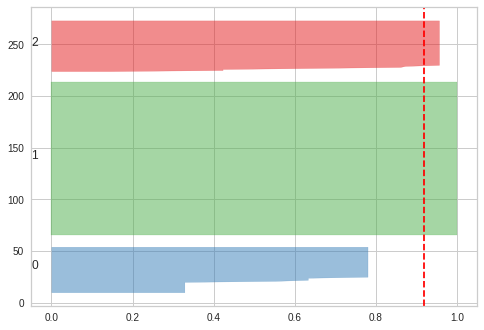

In [47]:
kmeans = KMeans(n_clusters=3)
model_km = SilhouetteVisualizer(kmeans, colors='yellowbrick')
model_km.fit(tfidf_matrix) # Fit the data to the visualizer

#Topic Modeling

In [48]:
from gensim import corpora

In [49]:
df_forums_list= [i.split() for i in df_forums.lemmatized]
df_forums_list

[['really',
  'care',
  'make',
  'new',
  'website',
  'perfect',
  'possible',
  'please',
  'report',
  'issue',
  'whether',
  'outright',
  'error',
  'feature',
  'think',
  'dont',
  'work',
  'wish',
  'team',
  'may',
  'end',
  'cater',
  'utmost',
  'wish',
  'disney',
  'base',
  'animation',
  'click',
  'make',
  'link',
  'much',
  'want',
  'feedback',
  'vital',
  'importance',
  'work',
  'roll',
  'period',
  'many',
  'thing',
  'dont',
  'work',
  'properly',
  'need',
  'identify',
  'thing',
  'fix',
  'please',
  'report',
  'away'],
 ['look', 'around', 'maybe', 'hour', 'heck', 'chat'],
 ['click', 'home', 'youll', 'see', 'bottom', 'forum', 'section'],
 ['second', 'lag', 'chat', 'u'],
 ['fyi',
  'lot',
  'people',
  'trouble',
  'get',
  'thru',
  'password',
  'change',
  'login',
  'screen',
  'first',
  'site',
  'trouble',
  'recognize',
  'email',
  'address',
  'correct',
  'profile',
  'first',
  'finally',
  'work',
  'second',
  'gmail',
  'least',
  'se

In [51]:
dictionary = corpora.Dictionary(df_forums_list)

In [52]:
corpus = [dictionary.doc2bow(text) for text in df_forums_list]

In [60]:
# LDA 
import gensim

lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics =4, id2word=dictionary)
 
topics = lda_model.print_topics(num_words=12)
for topic in topics:
         print("Theme %d: " % (topic[0]))
         print(topic[1])

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Theme 0: 
0.017*"information" + 0.017*"use" + 0.009*"post" + 0.008*"site" + 0.006*"service" + 0.006*"type" + 0.006*"privacy" + 0.006*"party" + 0.006*"see" + 0.006*"may" + 0.006*"page" + 0.005*"provide"
Theme 1: 
0.010*"use" + 0.008*"page" + 0.008*"site" + 0.007*"profile" + 0.007*"like" + 0.006*"discussion" + 0.006*"see" + 0.005*"home" + 0.005*"one" + 0.005*"know" + 0.005*"new" + 0.005*"make"
Theme 2: 
0.011*"use" + 0.010*"information" + 0.007*"site" + 0.006*"new" + 0.006*"service" + 0.005*"time" + 0.005*"u" + 0.005*"make" + 0.005*"like" + 0.005*"party" + 0.005*"may" + 0.004*"would"
Theme 3: 
0.013*"use" + 0.007*"post" + 0.006*"pump" + 0.006*"information" + 0.005*"may" + 0.005*"site" + 0.005*"link" + 0.005*"get" + 0.005*"blog" + 0.005*"service" + 0.005*"work" + 0.004*"party"


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [55]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=02dbf30ca6325d6341778d0966039794c1e91a156df5946e848bc9ba47803e8c
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [56]:
import pyLDAvis.gensim

In [61]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)